# Rt Live Model

In [1]:
%load_ext autoreload
%autoreload 2

import pymc3 as pm
import pandas as pd
import numpy as np
import arviz as az
from matplotlib import pyplot as plt
from covid.models.generative import GenerativeModel
from covid.data import summarize_inference_data
%config InlineBackend.figure_format = 'retina'

from covid.data import get_and_process_covidtracking_data_il, get_and_process_covidtracking_data_ilsev, summarize_inference_data

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
Matplotlib created a temporary config/cache directory at /tmp/matplotlib-3aeh03sf because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


## Fetch data and select the state's data

In [2]:
df = get_and_process_covidtracking_data_il(run_date=pd.Timestamp.today())#-pd.Timedelta(days=1))
dfsev = get_and_process_covidtracking_data_ilsev(run_date=pd.Timestamp.today()-pd.Timedelta(days=1))

In [3]:
region = "Israel"
model_data = df.loc[region]
model_sev = dfsev.loc[region]

## Create the model instance and sample

In [4]:
gmsev = GenerativeModel(region, model_sev, buffer_days = 20, delay=5+9)
gmsev.sample()

Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, seed, log_r_t]


Sampling 4 chains for 700 tune and 200 draw iterations (2_800 + 800 draws total) took 4944 seconds.


In [5]:
gm = GenerativeModel(region, model_data, delay=5)
gm.sample()



Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, seed, log_r_t]


Sampling 4 chains for 700 tune and 200 draw iterations (2_800 + 800 draws total) took 4527 seconds.


## Summarize Model Output

In [6]:
result = summarize_inference_data(gm.inference_data)
resultsev = summarize_inference_data(gmsev.inference_data)

In [7]:
result.tail(30)

,mean,median,lower_80,upper_80,infections,test_adjusted_positive,test_adjusted_positive_raw,positive,tests
date,,,,,,,,,
2020-09-04,1.101239,1.100107,1.020159,1.172478,2223.470884,2125.910405,2154.228279,2622,30738
2020-09-05,1.101528,1.100069,1.018734,1.168516,2265.077839,2162.854495,2485.460423,1505,15292
2020-09-06,1.102864,1.101311,1.012553,1.171970,2307.858522,2200.679858,2940.148788,2180,18725
2020-09-07,1.102557,1.101855,1.029139,1.192546,2351.718060,2239.312989,2139.496195,3390,40015
2020-09-08,1.102704,1.100040,1.019006,1.183548,2396.711326,2278.756424,2007.258611,3529,44400
2020-09-09,1.104198,1.101612,1.025650,1.195674,2442.734155,2319.065928,2236.549930,3995,45110
2020-09-10,1.100839,1.098586,1.013090,1.184991,2489.646042,2360.302407,2217.829393,4161,47381
2020-09-11,1.101201,1.099651,1.005703,1.187728,2537.733816,2402.521675,2348.533414,3979,42787
2020-09-12,1.097764,1.096222,1.007280,1.187823,2586.289251,2445.779987,2305.477170,2719,29784


In [8]:
resultsev.tail(30)

,mean,median,lower_80,upper_80,infections,test_adjusted_positive,test_adjusted_positive_raw,positive,tests
date,,,,,,,,,
2020-09-03,1.190481,1.185779,1.074778,1.286698,56.338010,52.152681,31.0,31.0,10000
2020-09-04,1.187770,1.183275,1.069731,1.292482,58.346277,53.349746,54.0,54.0,10000
2020-09-05,1.184573,1.182557,1.055737,1.294526,60.410838,54.653613,53.0,53.0,10000
2020-09-06,1.183775,1.183931,1.051467,1.305181,62.523836,56.067854,59.0,59.0,10000
2020-09-07,1.183309,1.181123,1.031400,1.302840,64.683976,57.595342,54.0,54.0,10000
2020-09-08,1.179860,1.180879,1.032049,1.311432,66.905809,59.238535,60.0,60.0,10000
2020-09-09,1.179798,1.178259,1.018575,1.313901,69.207202,61.000071,78.0,78.0,10000
2020-09-10,1.179843,1.178337,1.030288,1.342550,71.581260,62.882215,68.0,68.0,10000
2020-09-11,1.181721,1.176626,1.004020,1.325027,74.036544,64.886231,45.0,45.0,10000


## Plot Model Output

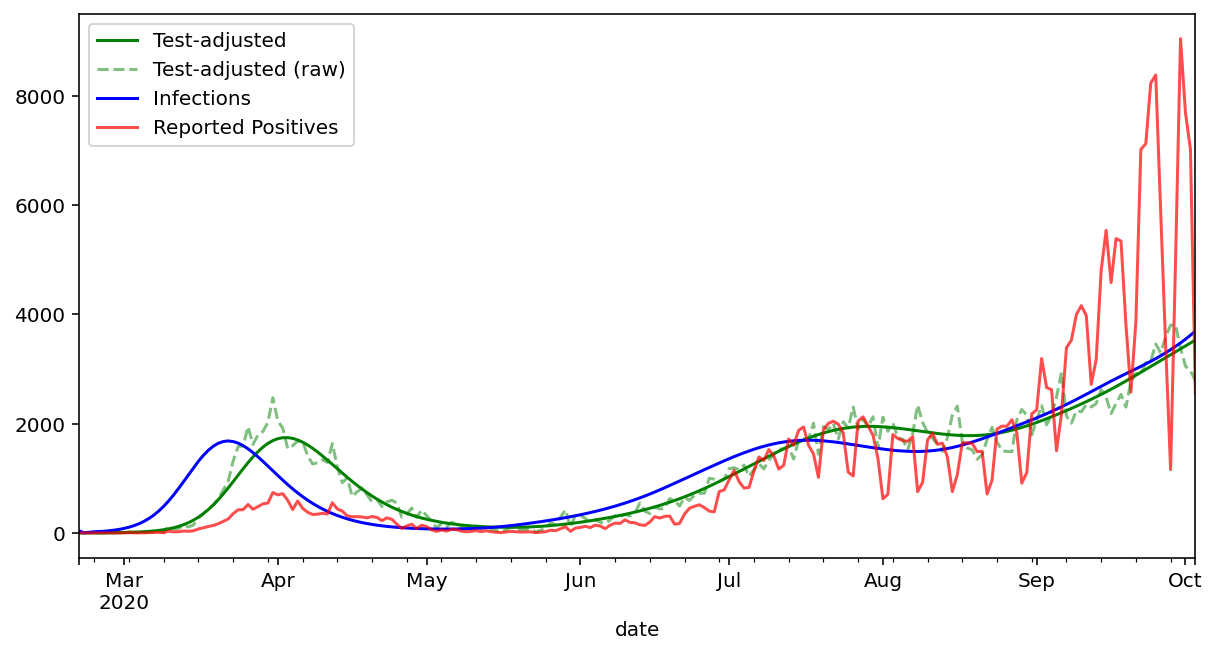

In [9]:
fig, ax = plt.subplots(figsize=(10,5))
result.test_adjusted_positive.plot(c="g", label="Test-adjusted")
result.test_adjusted_positive_raw.plot(c="g", alpha=.5, label="Test-adjusted (raw)", style="--")
result.infections.plot(c="b", label="Infections")
gm.observed.positive.plot(c='r', alpha=.7, label="Reported Positives")
fig.set_facecolor('w')
ax.legend();

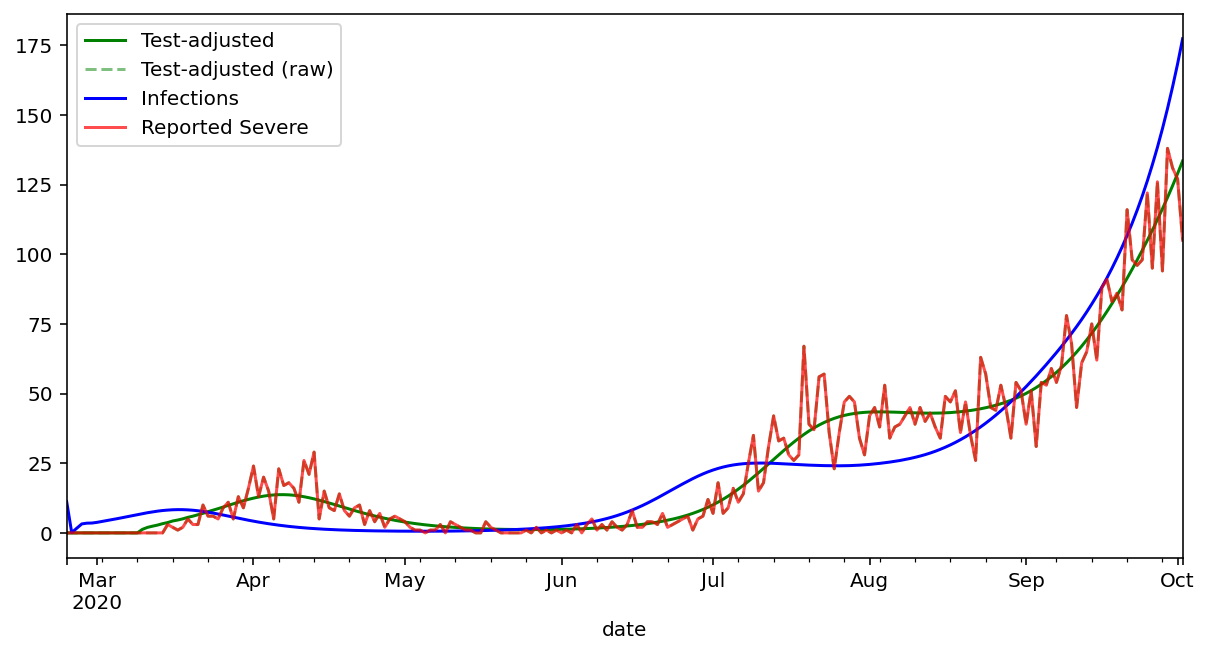

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
resultsev.test_adjusted_positive.plot(c="g", label="Test-adjusted")
resultsev.test_adjusted_positive_raw.plot(c="g", alpha=.5, label="Test-adjusted (raw)", style="--")
resultsev.infections.plot(c="b", label="Infections")
gmsev.observed.positive.plot(c='r', alpha=.7, label="Reported Severe")
fig.set_facecolor('w')
ax.legend();

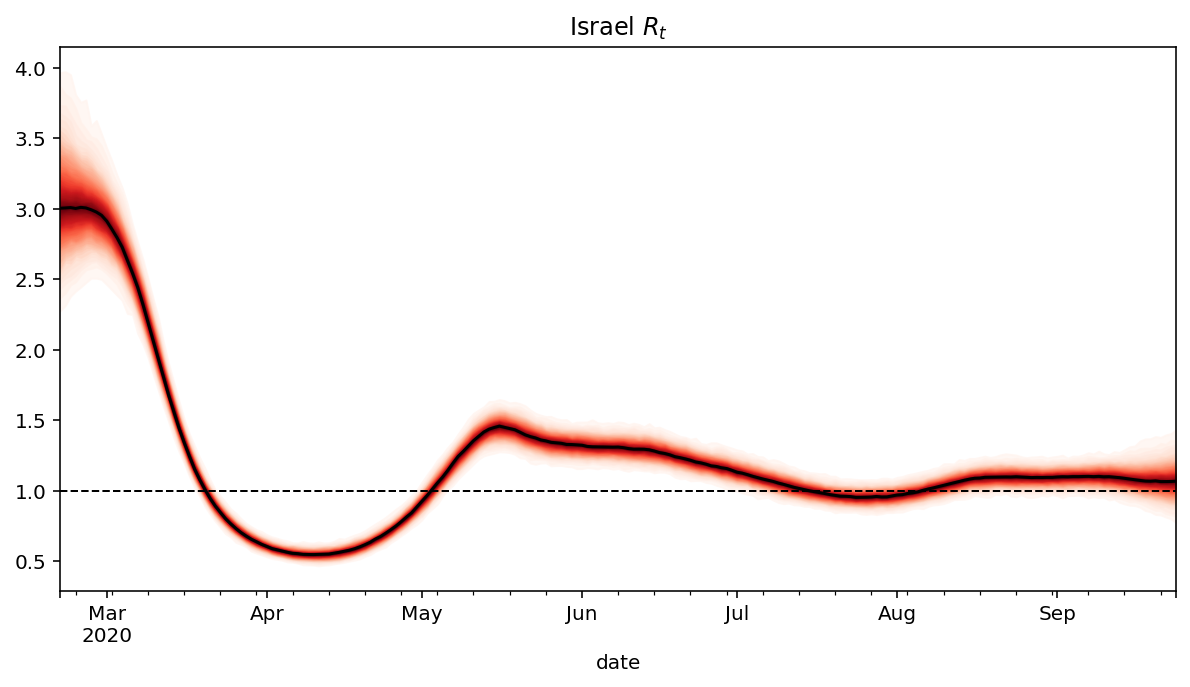

In [11]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title(f"{region} $R_t$")
samples = gm.trace['r_t']
x=result.index
cmap = plt.get_cmap("Reds")
percs = np.linspace(51, 99, 40)
colors = (percs - np.min(percs)) / (np.max(percs) - np.min(percs))
samples = samples.T

result["median"].plot(c="k", ls='-')

for i, p in enumerate(percs[::-1]):
    upper = np.percentile(samples, p, axis=1)
    lower = np.percentile(samples, 100-p, axis=1)
    color_val = colors[i]
    ax.fill_between(x, upper, lower, color=cmap(color_val), alpha=.8)

ax.axhline(1.0, c="k", lw=1, linestyle="--")
ax.set_xlim(right=pd.Timestamp.today()-pd.Timedelta(days=10))
fig.set_facecolor('w')

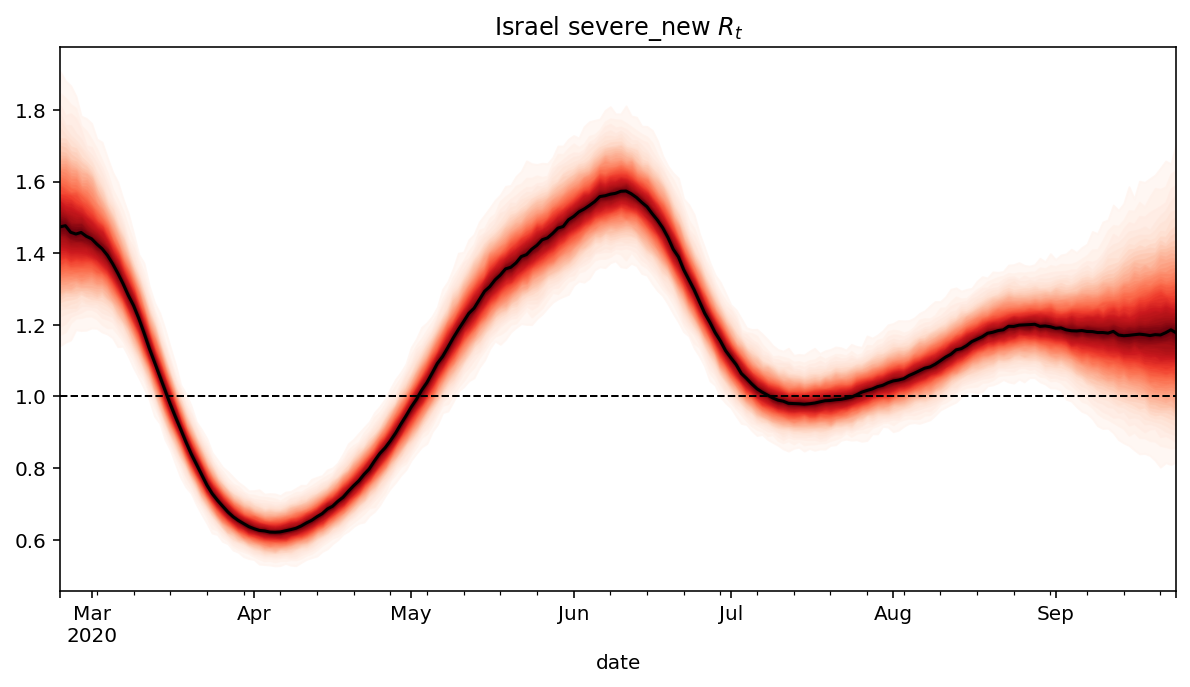

In [12]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title(f"{region} severe_new $R_t$")
samples = gmsev.trace['r_t']
x=resultsev.index
cmap = plt.get_cmap("Reds")
percs = np.linspace(51, 99, 40)
colors = (percs - np.min(percs)) / (np.max(percs) - np.min(percs))
samples = samples.T

resultsev["median"].plot(c="k", ls='-')

for i, p in enumerate(percs[::-1]):
    upper = np.percentile(samples, p, axis=1)
    lower = np.percentile(samples, 100-p, axis=1)
    color_val = colors[i]
    ax.fill_between(x, upper, lower, color=cmap(color_val), alpha=.8)

ax.axhline(1.0, c="k", lw=1, linestyle="--")
ax.set_xlim(right=pd.Timestamp.today()-pd.Timedelta(days=10))
fig.set_facecolor('w')